## Perceptron
### A Perceptron is a single layer and a single neuron neural network. It is a linear classifier. It is a linear classifier because it uses a linear function to separate the data into two class(i.e it does the binary classification).
### Perceptron learning rule is used to train the perceptron. It is a supervised learning algorithm because it uses the labeled data to train the model.
### Perceptron Learning Rule
- The updation of the weights is done using the perceptron learning rule which is as follows:
- $w_{i} = w_{i} + \eta (y_{actual} - y_{predicted})x_{i}$
- $\eta$ is the learning rate.
- $y_{actual}$ is the actual output.
- $y_{predicted}$ is the predicted output.
- $x_{i}$ is the input dat-

### Activation Function
- The activation function is used to convert the weighted sum into the output.
- The activation function used in the perceptron is the step function.
- The step function is as follows:
- $y = 1$ if $z \geq 0$
- $y = 0$ if $z < 0$
- $z$ is the weighted sum.
- $y$ is the output.

### Perceptron Algorithm
- The algorithm is as follows:
- Initialize the weights to zero.
- For each data point in the training data:
    - Calculate the weighted sum.
    - Apply the activation function.
    - Compare the output of the activation function with the actual output.
    - If the output of the activation function and actual output are same then the model is trained.
    - If the output of the activation function and actual output are different then the model is not trained.
    - If the model is not trained then the weights are updated using the perceptron learning rule.
- Repeat the above steps until the model is trained.



In [ ]:
# Implementation of Perceptron Algorithm

# imports
import numpy as np
import matplotlib.pyplot as plt




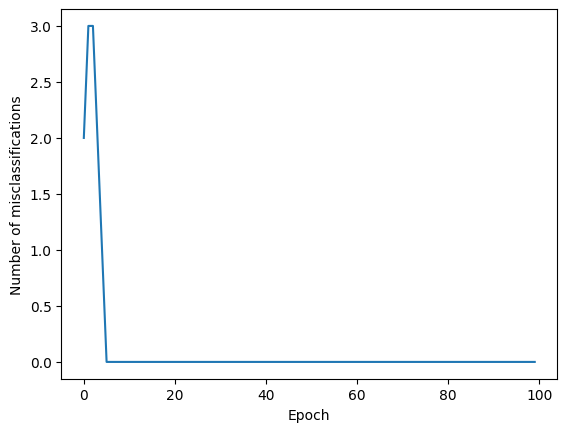

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
[1]


'\nQ. Which activation function is used in the Perceptron algorithm?\nA. The Heaviside step function is used as the activation function in the Perceptron algorithm. i.e the activation function is given by: \na = 1 if z >= 0 else 0\n\nQ. Which algorithm is used to update the weights in the Perceptron algorithm?\nA. The Perceptron algorithm uses the delta rule to update the weights. i.e the weights are updated as:\n    W = W + learning_rate * error * X[i]\n\nQ. Is the delta rule used in the Perceptron algorithm the same as the delta rule used in the Gradient Descent algorithm?\nA. No, the delta rule used in the Perceptron algorithm is different from the delta rule used in the Gradient Descent algorithm. The delta rule used in the Perceptron algorithm is given by:\n    W = W + learning_rate * error * X[i]\nwhile the delta rule used in the Gradient Descent algorithm is given by:\n    W = W - learning_rate * gradient\n    \nQ. Is both delta rule and gradient descent used in the Perceptron a

In [8]:
# Implementation of Perceptron Algorithm

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Perceptron:
    def __init__(self, n_iter=100, learning_rate=0.01):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        # Here X is a 2D array of shape (n_samples, n_features) and y is a 1D array of shape (n_samples,)
        
        # Add a column of 1s to X for bias
        X = np.c_[np.ones(X.shape[0]), X]  # np.c_ is used to concatenate 2D arrays column-wise
        
        # Now X is a 2D array of shape (n_samples, n_features + 1) and y is a 1D array of shape (n_samples,)
        
        # Initialize weights to random values
        W = np.zeros(X.shape[1])
        
        # Now W is a 1D array of shape (n_features + 1,)
        
        # Initialize a list to store the number of misclassifications in each epoch(iteration)
        misclassifications = []
        
        # Iterate over the number of epochs
        for _ in range(self.n_iter):
            # Initialize the number of misclassifications in each epoch to 0
            misclassification = 0
            
            # Iterate over each sample
            for i in range(X.shape[0]):
                # Calculate the dot product of the ith sample and the weights
                z = np.dot(X[i], W)
                
                # Calculate the activation value
                a = np.where(z >= 0, 1, 0)
                
                # Calculate the error
                error = y[i] - a
                
                # Update the weights
                W = W + self.learning_rate * error * X[i]
                
                # Update the number of misclassifications
                misclassification += int(error != 0.0)
                
            # Append the number of misclassifications in each epoch to the list
            misclassifications.append(misclassification)
            
        # Store the weights and misclassifications in the object
        self.W = W
        self.misclassifications = misclassifications
        
    def predict(self, X):
        # Add a column of 1s to x for bias
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Calculate the dot product of x and the weights
        z = np.dot(X, self.W)
        
        # Calculate the activation value
        a = np.where(z >= 0, 1, 0)
        
        # Return the activation value
        return a
    
    def plot_misclassifications(self):
        # Plot the number of misclassifications in each epoch
        plt.plot(self.misclassifications)
        plt.xlabel('Epoch')
        plt.ylabel('Number of misclassifications')
        plt.show()
        
        
    def accuracy(self, X, y):
        # Calculate the accuracy of the model
        
        # Calculate the predictions
        y_pred = self.predict(X)
        
        # Calculate the number of correct predictions
        correct = np.sum(y == y_pred)
        
        # Calculate the accuracy
        accuracy = correct / len(y)
        
        # Return the accuracy
        return accuracy
    
    def confusion_matrix(self, X, y):
        # Calculate the confusion matrix
        
        # Calculate the predictions
        y_pred = self.predict(X)
        
        # Calculate the confusion matrix
        matrix = np.zeros((2, 2))
        for i in range(len(y)):
            matrix[y[i]][y_pred[i]] += 1
            
        # Return the confusion matrix
        return matrix
    
    def precision(self, X, y):
        # Calculate the precision of the model
        
        # Calculate the confusion matrix
        matrix = self.confusion_matrix(X, y)
        
        # Calculate the precision
        precision = matrix[1][1] / (matrix[1][1] + matrix[0][1])
        
        # Return the precision
        return precision
    
    def recall(self, X, y):
        # Calculate the recall of the model
        
        # Calculate the confusion matrix
        matrix = self.confusion_matrix(X, y)
        
        # Calculate the recall
        recall = matrix[1][1] / (matrix[1][1] + matrix[1][0])
        
        # Return the recall
        return recall
    
    def f1_score(self, X, y):
        # Calculate the F1 score of the model
        
        # Calculate the precision and recall
        precision = self.precision(X, y)
        recall = self.recall(X, y)
        
        # Calculate the F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        # Return the F1 score
        return f1_score
    
    def classification_report(self, X, y):
        # Calculate the classification report
        
        # Calculate the accuracy, precision, recall and F1 score
        accuracy = self.accuracy(X, y)
        precision = self.precision(X, y)
        recall = self.recall(X, y)
        f1_score = self.f1_score(X, y)
        
        # Print the classification report
        print('Accuracy: {:.2f}'.format(accuracy))
        print('Precision: {:.2f}'.format(precision))
        print('Recall: {:.2f}'.format(recall))
        print('F1 Score: {:.2f}'.format(f1_score))
        

# Create an object of the Perceptron class
perceptron = Perceptron(learning_rate=0.01, n_iter=100)

# Learning an AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Train the model
perceptron.fit(X, y)

# Plot the number of misclassifications in each epoch
perceptron.plot_misclassifications()

# Print the classification report
perceptron.classification_report(X, y)

# Prediction on a new sample
X_new = np.array([[2, 2]])

# Print the prediction
print(perceptron.predict(X_new))



### Which activation function is used in the Perceptron algorithm?
- The Heaviside step function is used as the activation function in the Perceptron algorithm. i.e the activation function is given by: 
$$
y = \begin{cases}
      1 & \text{if } z \geq 0 \\
      0 & \text{if } z < 0
    \end{cases}
$$

### Which algorithm is used to update the weights in the Perceptron algorithm?
- The Perceptron algorithm uses the delta rule to update the weights. i.e the weights are updated as:
$$
W = W + learning\_rate * (y_{actual} - y_{predicted}) * X
$$

### Is the delta rule used in the Perceptron algorithm the same as the delta rule used in the Gradient Descent algorithm?
- No, the delta rule used in the Perceptron algorithm is different from the delta rule used in the Gradient Descent algorithm. The delta rule used in the Perceptron algorithm is given by:
$$
W = W + learning\_rate * (y_{actual} - y_{predicted}) * X
$$
while the delta rule used in the Gradient Descent algorithm is given by:
$$
W = W + learning\_rate * gradient
$$
    
### Is both delta rule and gradient descent used in the Perceptron algorithm?
- No, only the delta rule is used in the Perceptron algorithm. The gradient descent is used in the Gradient Descent algorithm.

### What is the difference between the Perceptron algorithm and the Gradient Descent algorithm?
- The Perceptron algorithm is a single layer neural network while the Gradient Descent algorithm is a multi-layer neural network. The Perceptron algorithm uses the delta rule to update the weights while the Gradient Descent algorithm uses the gradient descent to update the weights. The Perceptron algorithm is used for classification problems while the Gradient Descent algorithm is used for regression problems.
